# Problem Statement: Fuel Efficiency Analysis

In [121]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import random

import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df= pd.read_csv('/content/fleet_data.csv')

In [82]:
df.head()

,Vehicle_ID,Date,Distance_Travelled (miles),Fuel_Consumed (gallons),Maintenance_Cost ($),Status
0,V082,2025-08-06,270,18.60,187,In Service
1,V015,2025-12-01,125,13.80,59,In Service
2,V004,2025-05-24,243,12.47,83,Active
3,V095,2025-11-15,176,17.32,63,In Service
4,V036,2025-10-27,299,14.57,111,Active


In [83]:
# Calculate the fuel efficiency (miles per gallon) for each vehicle.
df['Fuel Efficiency (MPG)'] = df['Distance_Travelled (miles)'] / df['Fuel_Consumed (gallons)']

In [84]:
df.head(2)

,Vehicle_ID,Date,Distance_Travelled (miles),Fuel_Consumed (gallons),Maintenance_Cost ($),Status,Fuel Efficiency (MPG)
0,V082,2025-08-06,270,18.6,187,In Service,14.516129
1,V015,2025-12-01,125,13.8,59,In Service,9.057971


In [85]:
# Problem Statement: Calculate the average fuel efficiency across the entire fleet
avg_fuel_efficiency = df['Fuel Efficiency (MPG)'].mean()
print(f'Average Fuel Efficiency is :{avg_fuel_efficiency}')

Average Fuel Efficiency is :10.969942828378526


In [86]:
# Problem Statement: Maintenance Cost Analysis
# Identify vehicles with the highest total maintenance costs.
total_maintenance = df.groupby('Vehicle_ID')['Maintenance_Cost ($)'].sum().reset_index()




In [87]:
total_maintenance

,Vehicle_ID,Maintenance_Cost ($)
0,V001,128583
1,V002,121514
2,V003,125497
3,V004,126288
4,V005,118716
...,...,...
95,V096,126343
96,V097,126800
97,V098,129062
98,V099,125034


In [88]:
# Problem Statement: Sort by maintenance cost to identify vehicles with the highest costs
total_maintenance_sorted = total_maintenance.sort_values(by='Maintenance_Cost ($)', ascending=False)


In [89]:
total_maintenance_sorted

,Vehicle_ID,Maintenance_Cost ($)
73,V074,139031
87,V088,134368
88,V089,134290
84,V085,133262
10,V011,131863
...,...,...
32,V033,118441
65,V066,118171
79,V080,116651
90,V091,114520


In [90]:
# Show top 5 vehicles with the highest maintenance costs
print(total_maintenance_sorted.head())

   Vehicle_ID  Maintenance_Cost ($)
73       V074                139031
87       V088                134368
88       V089                134290
84       V085                133262
10       V011                131863


In [91]:
# Problem Statement: Distance Travelled vs Fuel Consumption Analysis
# Calculate the correlation between distance travelled and fuel consumed.
correlation = df['Distance_Travelled (miles)'].corr(df['Fuel_Consumed (gallons)'])

In [92]:
correlation

np.float64(-0.0007552919615531139)

In [93]:
print(f'Correlation between Distance and Fuel Consumed: {correlation}')

Correlation between Distance and Fuel Consumed: -0.0007552919615531139


In [94]:
# Problem Statement: Vehicle Status Analysis
# Identify the number of vehicles that are 'Active' vs 'In Service'
status_counts = df['Status'].value_counts()
print(status_counts)

Status
In Service    50094
Active        49906
Name: count, dtype: int64


In [95]:
# Problem Statement: Calculate the percentage of vehicles that are Active
active_percentage = (status_counts['Active'] / len(df)) * 100

In [96]:
 print(f'The percentage of active vehicles: {active_percentage}%')

The percentage of active vehicles: 49.906%


Problem Statement: Time-Based Analysis (Trends)
Analyze trends over time, such as fuel consumption or maintenance costs per month.

In [97]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [98]:
df.head(2)

,Vehicle_ID,Date,Distance_Travelled (miles),Fuel_Consumed (gallons),Maintenance_Cost ($),Status,Fuel Efficiency (MPG)
0,V082,2025-08-06,270,18.6,187,In Service,14.516129
1,V015,2025-12-01,125,13.8,59,In Service,9.057971


In [99]:
# Group by month and calculate the total fuel consumed and maintenance costs per month
df_monthly = df.groupby(df['Date'].dt.to_period('M')).agg({'Fuel_Consumed (gallons)': 'sum',
                                                            'Maintenance_Cost ($)': 'sum'}).reset_index()

In [100]:
df_monthly

,Date,Fuel_Consumed (gallons),Maintenance_Cost ($)
0,2025-01,167733.21,1041266
1,2025-02,154854.71,973591
2,2025-03,171977.12,1070987
3,2025-04,165652.70,1028771
4,2025-05,169785.62,1058304
5,2025-06,160410.55,1005230
6,2025-07,169325.85,1057046
7,2025-08,168994.22,1056534
8,2025-09,167223.03,1040501
9,2025-10,168797.59,1054087


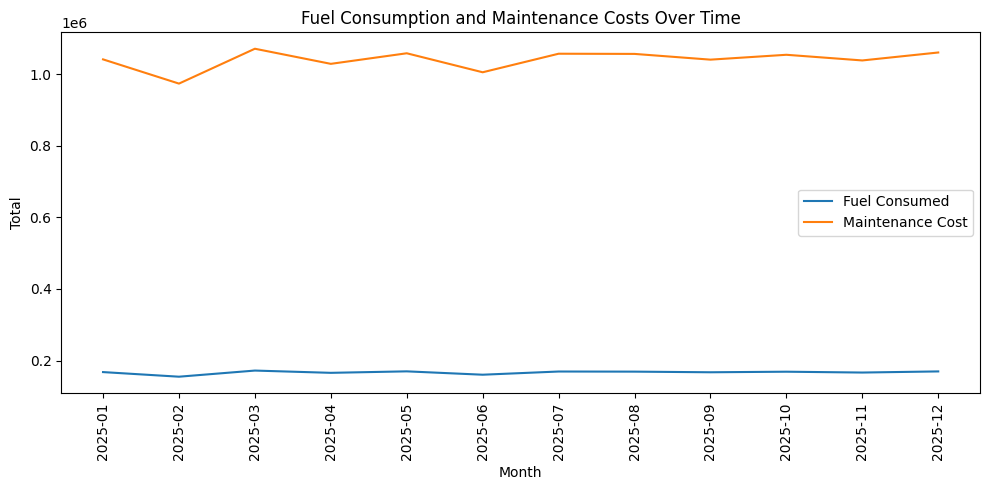

In [101]:
# Problem Statement: Create a line plot to visualize fuel consumption and maintenance costs over time
plt.figure(figsize=(10, 5))
plt.plot(df_monthly['Date'].astype(str), df_monthly['Fuel_Consumed (gallons)'], label='Fuel Consumed')
plt.plot(df_monthly['Date'].astype(str), df_monthly['Maintenance_Cost ($)'], label='Maintenance Cost')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Total')
plt.legend()
plt.title('Fuel Consumption and Maintenance Costs Over Time')
plt.tight_layout()
plt.show()


Problem Statement: Predictive Analytics - Fuel Consumption Prediction

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
# Predict the fuel consumption based on distance travelled using a simple Linear Regression model
X = df[['Distance_Travelled (miles)']]  # Independent variable
y = df['Fuel_Consumed (gallons)']       # Dependent variable

In [104]:
X

,Distance_Travelled (miles)
0,270
1,125
2,243
3,176
4,299
...,...
99995,156
99996,274
99997,260
99998,146


In [105]:
y

,Fuel_Consumed (gallons)
0,18.60
1,13.80
2,12.47
3,17.32
4,14.57
...,...
99995,20.76
99996,18.91
99997,16.45
99998,11.46


In [106]:
# Create a model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [107]:

# Make predictions
predictions = model.predict(X)


In [108]:
predictions

array([20.0028865 , 20.01375723, 20.0049107 , ..., 20.0036362 ,
       20.01218285, 20.01443197])

In [109]:
df['Predicted Fuel Consumption'] = predictions

In [110]:
df['Predicted Fuel Consumption']

,Predicted Fuel Consumption
0,20.002886
1,20.013757
2,20.004911
3,20.009934
4,20.000712
...,...
99995,20.011433
99996,20.002587
99997,20.003636
99998,20.012183


In [111]:
# Show the first few rows with actual vs predicted fuel consumption
print(df[['Distance_Travelled (miles)', 'Fuel_Consumed (gallons)', 'Predicted Fuel Consumption']].head())

   Distance_Travelled (miles)  Fuel_Consumed (gallons)  \
0                         270                    18.60   
1                         125                    13.80   
2                         243                    12.47   
3                         176                    17.32   
4                         299                    14.57   

   Predicted Fuel Consumption  
0                   20.002886  
1                   20.013757  
2                   20.004911  
3                   20.009934  
4                   20.000712  


In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [113]:
X = df[['Distance_Travelled (miles)']]  # Independent variable
y = df['Fuel_Consumed (gallons)']       # Dependent variable

In [114]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [115]:

# Predict fuel consumption on the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 33.058460998329814


In [116]:
  # Let's look at a comparison of actual vs predicted values for the test set
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

       Actual  Predicted
75721   12.58  20.313896
80184   17.57  20.307056
19864   19.97  20.236538
76699   26.75  20.012136
92991   12.91  19.876056


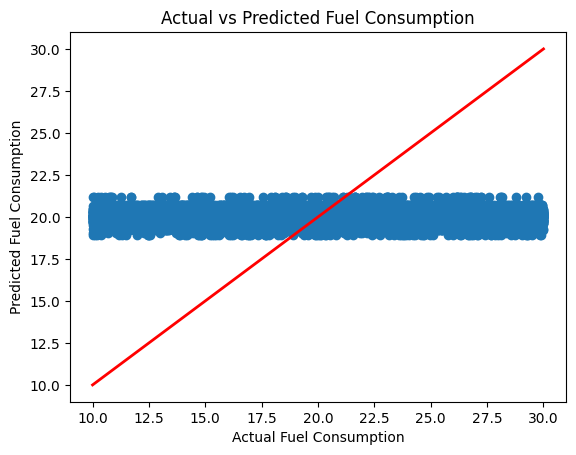

In [117]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted Fuel Consumption')
plt.xlabel('Actual Fuel Consumption')
plt.ylabel('Predicted Fuel Consumption')
plt.show()

In [118]:
# Problem Statement: Find the vehicles with the highest fuel consumption
# We can group by 'Vehicle_ID' and sum the fuel consumed

highest_fuel_consumed = df.groupby('Vehicle_ID')['Fuel_Consumed (gallons)'].sum().reset_index()

# Sort by 'Fuel_Consumed (gallons)' in descending order to get the highest fuel consumers
highest_fuel_consumed_sorted = highest_fuel_consumed.sort_values(by='Fuel_Consumed (gallons)', ascending=False)

# Display the top 5 vehicles with the highest fuel consumption
print("Top 5 Vehicles with the Highest Fuel Consumption:")
highest_fuel_consumed_sorted.head()

Top 5 Vehicles with the Highest Fuel Consumption:


,Vehicle_ID,Fuel_Consumed (gallons)
73,V074,21898.03
49,V050,21738.98
88,V089,21650.03
84,V085,21510.74
82,V083,21265.26


In [120]:

# Problem Statement: Find the vehicles with the highest maintenance costs
# Group by 'Vehicle_ID' and sum the maintenance cost

highest_maintenance_cost = df.groupby('Vehicle_ID')['Maintenance_Cost ($)'].sum().reset_index()

# Sort by Maintenance_Cost in descending order to get the highest maintenance cost vehicles
highest_maintenance_cost_sorted = highest_maintenance_cost.sort_values(by='Maintenance_Cost ($)', ascending=False)

# Display the top 5 vehicles with the highest maintenance cost
print("\nTop 5 Vehicles with the Highest Maintenance Cost:")
highest_maintenance_cost_sorted.head()


Top 5 Vehicles with the Highest Maintenance Cost:


,Vehicle_ID,Maintenance_Cost ($)
73,V074,139031
87,V088,134368
88,V089,134290
84,V085,133262
10,V011,131863


#Problem Solution's Summary
* Fuel Efficiency Analysis: Calculate miles per gallon (MPG) and
determine the average fuel efficiency across the fleet.

* Maintenance Cost Analysis: Identify vehicles with the highest total maintenance costs and determine whether it is cost-effective to continue maintaining them.

* Distance vs. Fuel Consumption: Analyze the relationship between distance travelled and fuel consumed, and calculate the correlation
between these two variables.

* Vehicle Status Analysis: Count the number of vehicles that are Active vs In Service and calculate the percentage of Active Vehicles.

* Time-Based Trends: Track fuel consumption and maintenance costs over time (monthly trends) to identify any patterns or seasonality.

* Predictive Analytics (Fuel Consumption): Use Linear Regression to predict fuel consumption based on the distance travelled.
* Find the vehicles with the highest maintenance costs .
* Find the vehicles with the highest fuel consumption .